Master Thesis
---
__THE ROLE OF LANGUAGE IN POLITICAL CAMPAIGNS: AN ANALYSIS OF ITS IMPACT ON LATINAMERICAN ELECTIONS__


Tilburg   University 

Alejandro Rivera 




#### Libraries

In [1]:
#Data manipulation
import pandas as pd
import numpy as np
import random

#Visualization
import matplotlib.pyplot as plt
#Visualization
    #WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import plotly.express as px
import seaborn as sns

#Train Test Split
from sklearn.model_selection import train_test_split

#Label Binarizer and OneHotEncoder (PENDIENTE)
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from collections import Counter

#Prepocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Embeddings
import torch
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer
from transformers import AutoModelForSequenceClassification
from sentence_transformers import SentenceTransformer

# Data normalization For Embeddings 
from sklearn.preprocessing import MinMaxScaler
# PCA
from sklearn.decomposition import PCA

#Model Comparison
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

#Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Data

In [2]:
# Upload database of speeches from a CSV file  <-Completo
df_UN = pd.read_excel('C:/Users/marte/OneDrive/Documentos/Alex/1. Master Thesis/speeches_UN.xlsx')
df_P = pd.read_excel('C:/Users/marte/OneDrive/Documentos/Alex/1. Master Thesis/DatabaseSpeeches_2.xlsx')

In [3]:
df_UN.info()
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      703 non-null    object
 1   by          703 non-null    object
 2   date        703 non-null    int64 
 3   id          703 non-null    object
 4   title       703 non-null    object
 5   content     701 non-null    object
 6   content_es  703 non-null    object
dtypes: int64(1), object(6)
memory usage: 38.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country         967 non-null    object        
 1   Leader          967 non-null    object        
 2   Label           967 non-null    object        
 3   Party           967 non-null    object        
 4   Title           967 non-null    object        
 5   Source Link 

In [4]:
print("Shape of UN data set", df_UN.shape)
print("Shape of Politicians Speeches data set",df_P.shape)

Shape of UN data set (703, 7)
Shape of Politicians Speeches data set (967, 9)


In [5]:
#INCLUDES INFORMATION
df_UN.head()

,author,by,date,id,title,content,content_es
0,guterres,"Statements by High Commissioner, 29 May 2014",1401314400000,538d801d6,Forced Displacement and the Promise of Plurali...,\n\nForced Displacement and the Promise of P...,"2014 Anual de pluralismo conferencia, nantón..."
1,guterres,"Statements by High Commissioner, 12 March 2014",1394578800000,5321c5c39,"Opening remarks by António Guterres, United Na...","\n\nOpening remarks by António Guterres, Uni...","no optimización de António Guterres, Alto Com..."
2,guterres,"Statements by High Commissioner, 6 March 2014",1394060400000,53189c329,Remarks to the United Nations Security Council...,\n\nRemarks to the United Nations Security C...,al Consejo de Seguridad de las Naciones Unid...
3,guterres,"Statements by High Commissioner, 5 March 2014",1393974000000,531983299,Remarks to the International Support Group for...,\n\nRemarks to the International Support Gro...,para el Grupo de Apoyo Internacional para la...
4,guterres,"Statements by High Commissioner, 25 February 2014",1393282800000,530cc5f19,"Remarks by António Guterres, United Nations Hi...","\n\nRemarks by António Guterres, United Nati...","por António Guterres, Alto Comisionado de la..."


In [6]:
#INCLUDES INFORMATION
df_P.head()

,Country,Leader,Label,Party,Title,Source Link,Source Content,Date,Speech
0,Chile,Gabriel Boric Font,Winner,Convergencia Social,Discurso de cierre de campaña segunda vuelta d...,https://www.youtube.com/watch?v=ZZCVaIfqxv0&li...,Gabriel Boric Font,2021-12-19,Déjeme mirar esto... \nDéjenme mirar esta fuer...
1,Chile,Gabriel Boric Font,Winner,Convergencia Social,Debate Anatel,https://www.youtube.com/watch?v=0DoqbFBJGKA&li...,Gabriel Boric Font,2021-12-14,chilenos y chilenas que han visto este\nprogra...
2,Chile,Gabriel Boric Font,Winner,Convergencia Social,Cuarto Retiro: Intervención de Gabriel Boric e...,https://www.youtube.com/watch?v=wttxN4ZHYFk&li...,Gabriel Boric Font,2021-12-03,muchas gracias presidente\nhace poco más de do...
3,Chile,Gabriel Boric Font,Winner,Convergencia Social,Compromiso con la seguridad,https://www.youtube.com/watch?v=8-wgw5w7WLQ&li...,Gabriel Boric Font,2021-11-25,estamos en la comuna de la pintana hoy\ndía no...
4,Chile,Gabriel Boric Font,Winner,Convergencia Social,Programa de gobierno,https://www.youtube.com/watch?v=N9BDRZpzjRI&li...,Gabriel Boric Font,2021-11-05,hay distintas maneras de construir un\nprogram...


#### EDA 1. Findings & Insights from Data

In [7]:
print(df_UN['author'].unique())

['guterres' 'lubbers' 'ogata' 'stoltenberg' 'hocké' 'hartling' 'khan'
 'schnyder' 'lindt' 'Goedhart']


In [8]:
df_UN.loc[df_UN['author'].str.contains('Goedhart')]

,author,by,date,id,title,content,content_es
677,Goedhart,"Statements by High Commissioner, 12 December 1955",-443581200000,3ae68fb918,"""Refugee Problems and their Solutions"" - Addre...","\n\n""Refugee Problems and their Solutions"" -...","""Problemas de refugiados y sus soluciones"" - ..."
678,Goedhart,"Statements by High Commissioner, 10 December 1955",-443754000000,3ae68fba24,"Address by Dr. Gerrit Jan van Heuven Goedhart,...",\n\nAddress by Dr. Gerrit Jan van Heuven Goe...,"por el Dr. Gerrit Jan Van Heuven Goedhart, ..."
679,Goedhart,"Statements by High Commissioner, 4 October 1955",-449546400000,3ae68fc418,Statement by Dr. Gerrit Jan van Heuven Goedhar...,\n\nStatement by Dr. Gerrit Jan van Heuven G...,"por el Dr. Gerrit Jan Van Heuven Goedhart, Al..."
680,Goedhart,"Statements by High Commissioner, 13 May 1955",-461988000000,3ae68fba0,"Address by Dr. Gerrit Jan van Heuven Goedhart,...",\n\nAddress by Dr. Gerrit Jan van Heuven Goe...,"por el Dr. Gerrit Jan Van Heuven Goedhart, ..."
681,Goedhart,"Statements by High Commissioner, 22 December 1954",-474253200000,3ae68fba38,Christmas Message for Refugees by Dr. Gerrit J...,\n\nChristmas Message for Refugees by Dr. Ge...,Mensaje para refugiados por el Dr. Gerrit J...
682,Goedhart,"Statements by High Commissioner, 22 April 1954",-495338400000,3ae68fb818,Statement by Dr. Gerrit Jan van Heuven Goedhar...,\n\nStatement by Dr. Gerrit Jan van Heuven G...,"por el Dr. Gerrit Jan Van Heuven Goedhart, ..."
683,Goedhart,"Statements by High Commissioner, 1 January 1954",-504925200000,3ae68fb610,"Speech by Dr. Gerrit Jan van Heuven Goedhart, ...",\n\nSpeech by Dr. Gerrit Jan van Heuven Goed...,"del Dr. Gerrit Jan van Heuven Goedhart, Alto ..."
684,Goedhart,"Statements by High Commissioner, 1 January 1954",-504925200000,3ae68fba40,Text of the speech by Dr. Gerrit Jan van Heuve...,\n\nText of the speech by Dr. Gerrit Jan van...,del discurso por el Dr. Gerrit Jan Van Heuv...
685,Goedhart,"Statements by High Commissioner, 13 October 1953",-511840800000,3ae68fd7e,Statement by Dr. Gerrit Jan van Heuven Goedhar...,\n\nStatement by Dr. Gerrit Jan van Heuven G...,"por el Dr. Gerrit Jan Van Heuven Goedhart, Al..."
686,Goedhart,"Statements by High Commissioner, 8 May 1953",-525492000000,3ae68fbb18,Message from Dr. Gerrit Jan van Heuven Goedhar...,\n\nMessage from Dr. Gerrit Jan van Heuven G...,"from Dr. Gerrit Jan van Heuven Goedhart, Uni..."


In [9]:
df_UN[['Date_Clean', 'Time_Clean']] = df_UN['by'].str.split(",", expand=True)

In [10]:
df_UN['Time_Clean'] = pd.to_datetime(df_UN['Time_Clean'])

In [11]:
df_UN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   author      703 non-null    object        
 1   by          703 non-null    object        
 2   date        703 non-null    int64         
 3   id          703 non-null    object        
 4   title       703 non-null    object        
 5   content     701 non-null    object        
 6   content_es  703 non-null    object        
 7   Date_Clean  703 non-null    object        
 8   Time_Clean  703 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 49.6+ KB


#### Label Binarizer

In [12]:
# We encountered a Binary Decision problem (Winner or Loser) LabelBinarizer
# Dataset YouTube
df_P['Label_Bi'] = LabelBinarizer().fit_transform(df_P.Label)
# Assigning random labels to UN Dataset
random_array = np.random.randint(2, size=len(df_UN))
df_UN['Label2'] = random_array

In [13]:
print(df_P['Label'].unique())
print(df_P['Label_Bi'].unique())
print('-'*10)
print(df_UN['Label2'].unique())

['Winner' 'Loser']
[1 0]
----------
[0 1]


### P R E P R O C E S S I N G

In [14]:
# Stopping Words & Lemmatization
words = stopwords.words("spanish")
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def txtfilter(text):
    speech_list = text.lower().split()
    new_txt = []
    for word in speech_list:
        new_word = ""
        for letter in word:
            if letter.isalpha() or letter.isdigit():
                new_word += letter
        new_txt.append(new_word)
    filtereed_word = [w for w in new_txt if not w in stop_words]
    Clean_Speech = " ".join(filtereed_word)
    return Clean_Speech

def word_count(text):
    return len(nltk.word_tokenize(text))

def histogram(df,X,xlabel, ylabel, title):
    plt.hist(X, bins=100)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    
def plotbar(label_counts,title):
    plt.bar(label_counts.index, label_counts.values,color='dimgrey')
    plt.xlabel('Label')
    plt.ylabel('# of Speeches')
    plt.title(title)
    plt.show()
    
      
def plot_wordcloud(df, category, plot_label, color):
    exclude_words = ['entonces', 'si','país','pais','toda','cosas','ser','va','asi',
                     'buen','día','música','ahí','hacer','voy','cosa','caso','sido',
                     'aqui','aquí','qué','cómo','hace','dice']
    stopwords = set(list(STOPWORDS) + exclude_words)
    grouped = df.groupby(category)
    wbs_mask = np.array(Image.open('Politician.jpg'))
    for group_name, group_df in grouped:
        word_cloud = WordCloud(mask=wbs_mask,width=1000, height=800, colormap=color, margin=0,
                               max_words=200, min_word_length=4,
                               max_font_size=120, min_font_size=15,
                               background_color="White",contour_width=1,
                               contour_color='black',stopwords=stopwords).generate(" ".join(group_df['Clean_Speech']))
        plt.figure(figsize=(10, 15))
        plt.imshow(word_cloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(plot_label + ' - ' + group_name)
        plt.show()
        
def mostComWord(data,n):
    # Create a bar chart of the most common words
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frequency', y='Word', data=data[data['Frequency'] > n].sort_values('Frequency', ascending=False),palette='ocean')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title('Most Common Words')
    plt.show()
    
#Data augmentation    
def random_insertion(text):
    words = text.split()
    num_insertions = int(len(words) * 0.20)  #Hyperparameter
    for _ in range(num_insertions):
        index = random.randint(0, len(words))
        words.insert(index, random.choice(words))
    return ' '.join(words)

Applying function to UN Dataset

In [15]:
df_UN['Clean_Speech'] = df_UN['content_es'].apply(txtfilter).apply(lambda x: "".join([lemmatizer.lemmatize(i) for i in x]))
df_UN['Word_Count'] = df_UN['Clean_Speech'].apply(word_count)

df_UN['Clean_Speech_wRandom'] = df_UN['content_es'].apply(txtfilter).apply(random_insertion).apply(lambda x: "".join([lemmatizer.lemmatize(i) for i in x]))
df_UN['Word_Count_wRandom'] = df_UN['Clean_Speech_wRandom'].apply(word_count)

Applying function to Politicians Dataset

In [16]:
df_P['Clean_Speech'] = df_P['Speech'].apply(txtfilter).apply(lambda x: "".join([lemmatizer.lemmatize(i) for i in x]))
df_P['Word_Count'] = df_P['Clean_Speech'].apply(word_count)

df_P['Clean_Speech_wRandom'] = df_P['Speech'].apply(txtfilter).apply(random_insertion).apply(lambda x: "".join([lemmatizer.lemmatize(i) for i in x]))
df_P['Word_Count_wRandom'] = df_P['Clean_Speech_wRandom'].apply(word_count)

In [17]:
print("Shape of the Column Clean Speech in the Politicians DS:", df_P['Clean_Speech'].shape)
print("Shape of the Column Clean Speech in the UN DS:", df_UN['Clean_Speech'].shape)

Shape of the Column Clean Speech in the Politicians DS: (967,)
Shape of the Column Clean Speech in the UN DS: (703,)


In [18]:
df_P

,Country,Leader,Label,Party,Title,Source Link,Source Content,Date,Speech,Label_Bi,Clean_Speech,Word_Count,Clean_Speech_wRandom,Word_Count_wRandom
0,Chile,Gabriel Boric Font,Winner,Convergencia Social,Discurso de cierre de campaña segunda vuelta d...,https://www.youtube.com/watch?v=ZZCVaIfqxv0&li...,Gabriel Boric Font,2021-12-19,Déjeme mirar esto... \nDéjenme mirar esta fuer...,1,déjeme mirar déjenme mirar fuerza escuchen fue...,1502,siguen déjeme mirar déjenme mirar llenando fue...,1802
1,Chile,Gabriel Boric Font,Winner,Convergencia Social,Debate Anatel,https://www.youtube.com/watch?v=0DoqbFBJGKA&li...,Gabriel Boric Font,2021-12-14,chilenos y chilenas que han visto este\nprogra...,1,chilenos chilenas visto programa casa quizás t...,91,quieren chilenos chilenas visto programa casa ...,109
2,Chile,Gabriel Boric Font,Winner,Convergencia Social,Cuarto Retiro: Intervención de Gabriel Boric e...,https://www.youtube.com/watch?v=wttxN4ZHYFk&li...,Gabriel Boric Font,2021-12-03,muchas gracias presidente\nhace poco más de do...,1,muchas gracias presidente hace dos meses misma...,402,muchas gracias presidente hace dos meses frent...,482
3,Chile,Gabriel Boric Font,Winner,Convergencia Social,Compromiso con la seguridad,https://www.youtube.com/watch?v=8-wgw5w7WLQ&li...,Gabriel Boric Font,2021-11-25,estamos en la comuna de la pintana hoy\ndía no...,1,comuna pintana hoy día reunimos víctimas grave...,87,comuna vamos pintana jamás hoy día reunimos ví...,104
4,Chile,Gabriel Boric Font,Winner,Convergencia Social,Programa de gobierno,https://www.youtube.com/watch?v=N9BDRZpzjRI&li...,Gabriel Boric Font,2021-11-05,hay distintas maneras de construir un\nprogram...,1,distintas maneras construir programa tradicion...,33,personas distintas maneras construir programa ...,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Cuba,Miguel Diaz-Canel,Winner,Partido Comunista de Cuba,Cuba: Retransmisión del discurso de Miguel Día...,https://www.youtube.com/watch?v=Ur4W8yh8-jo,Canal Caribe,2023-04-20,querido general de ejército Raúl Castro Ruz lí...,1,querido general ejército raúl castro ruz líder...,1838,querido general ejército raúl vecino castro ru...,2205
963,Cuba,Miguel Diaz-Canel,Winner,Partido Comunista de Cuba,Discurso de Miguel Díaz-Canel en la clausura d...,https://www.youtube.com/watch?v=XxTpOR2_8Is,Partido Comunista de Cuba,2021-12-18,bueno explicarle que hace solo unos\nbreves in...,1,bueno explicarle hace solo breves instantes re...,1987,bueno explicarle hace solo central breves inst...,2384
964,Cuba,Miguel Diaz-Canel,Winner,Partido Comunista de Cuba,Discurso de Miguel Díaz-Canel en la ONU: ¡Aquí...,https://www.youtube.com/watch?v=40rtpm__kqo,Cubadebate,2018-09-27,el día del presidente de los consejos de\nesta...,1,día presidente consejos ministros república pr...,1454,día país entrañable ruz presidente consejos mi...,1744
965,Cuba,Miguel Diaz-Canel,Winner,Partido Comunista de Cuba,Mensaje del presidente Díaz-Canel al pueblo de...,https://www.youtube.com/watch?v=zv6lm4erq18,Canal Caribe,2022-12-31,queridos compatriotas llegamos al 2023\ndespué...,1,queridos compatriotas llegamos 2023 después ve...,103,queridos ascendiendo compatriotas llegamos 202...,123


#### Distribution Graphs

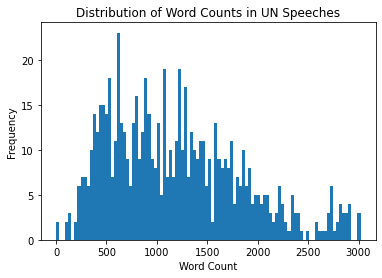

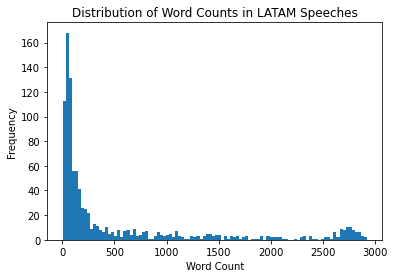

In [19]:
histogram(df_UN,df_UN['Word_Count'], 'Word Count', 'Frequency', 'Distribution of Word Counts in UN Speeches')
histogram(df_P,df_P['Word_Count'], 'Word Count', 'Frequency', 'Distribution of Word Counts in LATAM Speeches')

In [20]:
print(df_P['Word_Count'].mean())
print(df_UN['Word_Count'].mean())

529.8531540847983
1191.6159317211948


In [21]:
# Count the number of instances of each label
label_counts = df_P['Label'].value_counts()
label_counts_UN = df_UN['Label2'].value_counts()

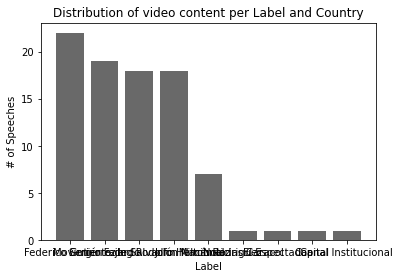

In [22]:
label = 'Loser'
country = 'Colombia'

Channel_counts = df_P[(df_P['Label'] == label) & (df_P['Country'] == country)]['Source Content'].value_counts()
plotbar(Channel_counts, 'Distribution of video content per Label and Country')


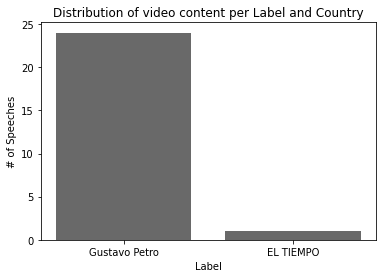

In [23]:
label = 'Winner'
country = 'Colombia'

Channel_counts = df_P[(df_P['Label'] == label) & (df_P['Country'] == country)]['Source Content'].value_counts()
plotbar(Channel_counts, 'Distribution of video content per Label and Country')

Loser     553
Winner    414
Name: Label, dtype: int64


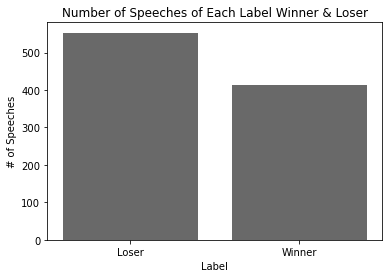

1    352
0    351
Name: Label2, dtype: int64


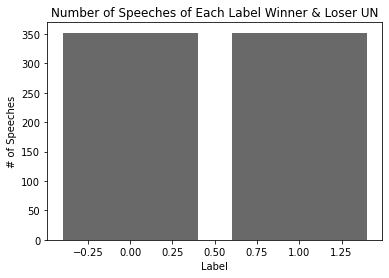

In [24]:
print(label_counts)
plotbar(label_counts, "Number of Speeches of Each Label Winner & Loser")
print(label_counts_UN)
plotbar(label_counts_UN,"Number of Speeches of Each Label Winner & Loser UN")

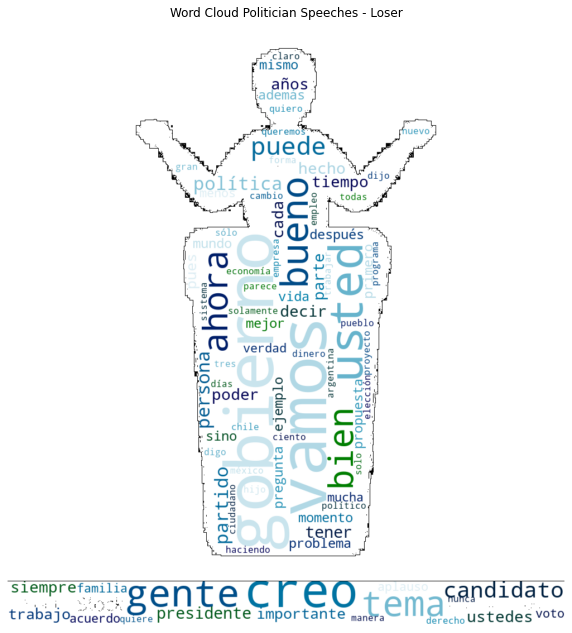

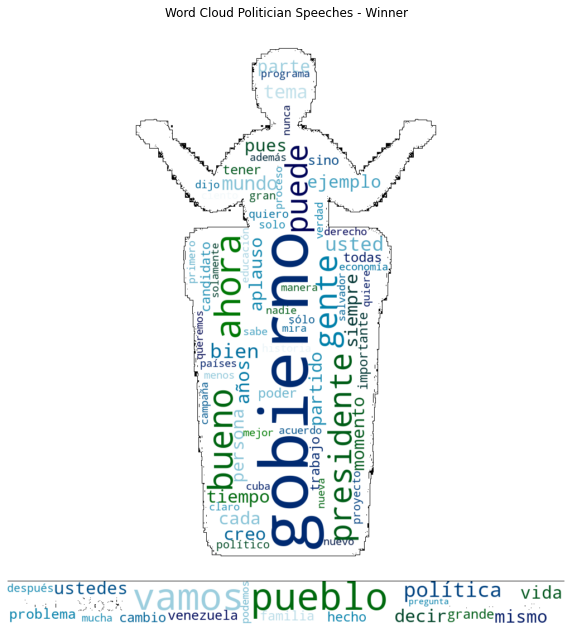

In [25]:
plot_wordcloud(df_P, 'Label', 'Word Cloud Politician Speeches', 'ocean')

#### Insights from frequency

WITHOUT DATA AUGMENTATION

In [26]:
# Word Frequency in the Speeches
P_count = df_P['Clean_Speech'].str.split(expand=True).stack().value_counts()
UN_count = df_UN['Clean_Speech'].str.split(expand=True).stack().value_counts()

exclude_words = ["entonces", "si",'país','pais','toda','cosas','ser','va','asi',
                 'buen','día','música','ahí','hacer','voy','cosa','caso','sido',
                 'aqui','aquí','qué','cómo','hace','dice','ver','así','tener']

# Filtering the list 
P_count_filtered = P_count[~P_count.index.isin(exclude_words)]
UN_count_filtered = UN_count[~UN_count.index.isin(exclude_words)]

P_count_num = pd.DataFrame({'Word': P_count_filtered.index, 'Frequency': P_count_filtered.values})
UN_count_num = pd.DataFrame({'Word': UN_count_filtered.index, 'Frequency': UN_count_filtered.values})

print(UN_count_num.head())
print("-"*30)
print(P_count_num.head())


            Word  Frequency
0     refugiados      19038
1          acnur       5849
2       personas       5399
3         países       4918
4  internacional       4005
------------------------------
       Word  Frequency
0     vamos       2998
1  gobierno       2343
2       hoy       2320
3     gente       1917
4     usted       1871


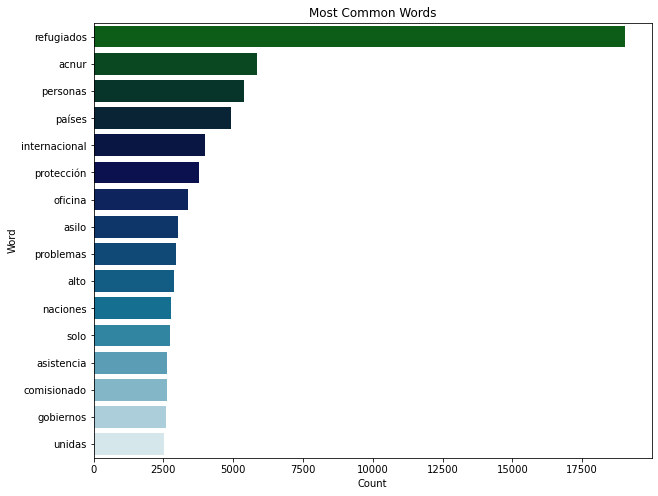

In [27]:
mostComWord(UN_count_num,2500)

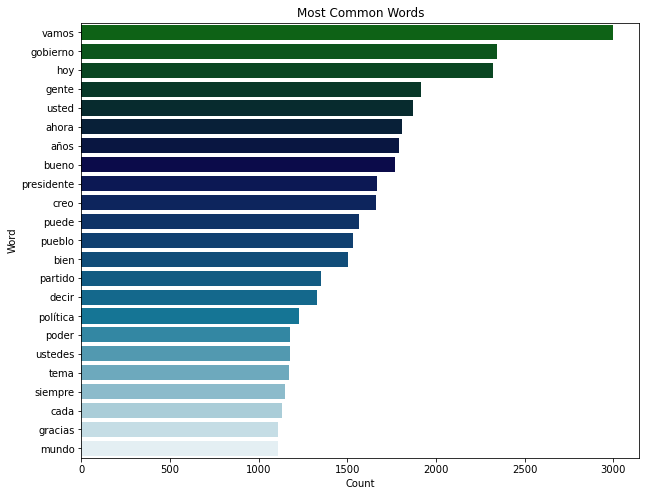

In [28]:
mostComWord(P_count_num,1100)

#### Embeddings Using BETO (BERT Spanish Version)

In [31]:
#Concatenate
sentences_concat = np.concatenate([df_P.Clean_Speech,df_UN.Clean_Speech])
sentences_concat_da = np.concatenate([df_P.Clean_Speech_wRandom,df_UN.Clean_Speech_wRandom])

In [32]:
label_bi = df_P.Label_Bi.values
label2 = df_UN.Label2.values

In [33]:
#Concatenate Label
labels_concat = np.concatenate([df_P.Label_Bi,df_UN.Label2])

In [34]:
#print("Example of a sentence before BETO:",sentences_concat[0], ".\n| Example of a label before BETO:",labels_concat[0])

In [35]:
# Use BERT-BETO sentece embbedings without DATA AUGMENTATION
model = SentenceTransformer('espejelomar/sentece-embeddings-BETO')
embeddings = model.encode(sentences_concat)
embeddings_da = model.encode(sentences_concat_da)
#Reference:https://huggingface.co/espejelomar/sentece-embeddings-BETO

In [36]:
print(embeddings)
print("-"*70)
print(embeddings_da)

[[-0.2036507  -0.34376395 -0.18455891 ... -0.7137657   0.2600813
   0.38719982]
 [-0.5600019   0.4590162  -0.06394244 ... -0.8376229   0.47408503
   0.57896143]
 [-0.7183908   0.24316567 -0.4868965  ...  0.02058874  0.15901357
  -0.07814921]
 ...
 [-0.66717076 -0.23610032 -0.79825014 ...  0.08061086  0.26129064
   0.25401363]
 [-0.7686983   0.06503881 -0.7813351  ... -0.35930604  0.42478576
   0.17156821]
 [-0.5859366   0.39840907 -0.87482786 ... -0.02170399  0.24590132
   0.36712998]]
----------------------------------------------------------------------
[[-0.09283163 -0.36532238  0.05263259 ... -0.6506355   0.09094413
   0.4096624 ]
 [-0.27218878  0.5686661  -0.21084628 ... -0.71152735  0.60372204
   0.5266754 ]
 [-0.6573792   0.24701686 -0.46779403 ...  0.07424203  0.15448685
   0.05523054]
 ...
 [-0.5396582   0.16702005 -0.7907787  ...  0.08505746  0.269235
   0.31190187]
 [-0.6940731   0.39727977 -0.5447987  ... -0.30931473  0.6389406
   0.16556092]
 [-0.58530295  0.40899107 -0.90

#### Train Test Split

Data Without Data Augmentation

In [37]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_concat, test_size=0.2, random_state=42)

Data With Data Augmentation

In [38]:
X_train_da, X_test_da, y_train_da, y_test_da = train_test_split(embeddings_da, labels_concat, test_size=0.2, random_state=42)

#### Normalization

In [39]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [40]:
# fit scaler on training data
norm_ = MinMaxScaler().fit(X_train_da)

# transform training data
X_train_norm_da = norm_.transform(X_train_da)

# transform testing dataabs
X_test_norm_da = norm_.transform(X_test_da)

In [41]:
X_train_norm

array([[0.5760138 , 0.69081104, 0.4342555 , ..., 0.715283  , 0.39159828,
        0.5431529 ],
       [0.5280386 , 0.19218281, 0.56603384, ..., 0.46694797, 0.40178525,
        0.64825404],
       [0.59778   , 0.8317029 , 0.73709714, ..., 0.22775245, 0.5163086 ,
        0.5995971 ],
       ...,
       [0.5224507 , 0.5545942 , 0.64033943, ..., 0.3148482 , 0.37851065,
        0.52709025],
       [0.48224938, 0.83506966, 0.42315078, ..., 0.64443487, 0.24431774,
        0.6082028 ],
       [0.5919131 , 0.6394241 , 0.30774072, ..., 0.5903694 , 0.31585634,
        0.48686653]], dtype=float32)

## Models

### SVM

In [109]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
ypredict_train = svm.predict(X_train)    
ypredict_test = svm.predict(X_test) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('BASELINE Result  ',f'Train ={train_acc}, Test= {test_acc}')

BASELINE Result   Train =0.7499799495519429, Test= 0.5860368338397618


In [107]:
train_result=[]
test_result=[]
best_result=0
parameters=None


for i in [1,1.5,2,3]: 
    for t in [0.1,0.12,0.15,0.18]:
        for g in ['scale']:
            for c in [0.001,0.01,0.1]:
                for d in [1,2]: #1,2
                    svm = SVC(kernel='poly', degree=d, random_state=42, C=i,tol=t, gamma=g, coef0=c)


                    svm.fit(X_train, y_train)
                    ypredict_train = svm.predict(X_train)    
                    ypredict_test = svm.predict(X_test) 

                    train_acc = f1_score(y_train, ypredict_train, average='weighted')
                    train_result.append(train_acc)
                    test_acc = f1_score(y_test, ypredict_test, average='weighted')
                    test_result.append(test_acc)
                    if test_acc > best_result:
                        best_result = test_acc
                        parameters ={'c':i, 'tol':t, 'gamma':g, 'coef':c, 'degree':d}
                                                   
                    #print(f'Train ={train_acc}, Test= {test_acc}, c={i}, tol={t}, gamma={g}, coef={c}')
print('Baseline Result  Train:',best_result,parameters)

Baseline Result  Train: 0.612121659035895 {'c': 2, 'tol': 0.18, 'gamma': 'scale', 'coef': 0.001, 'degree': 1}


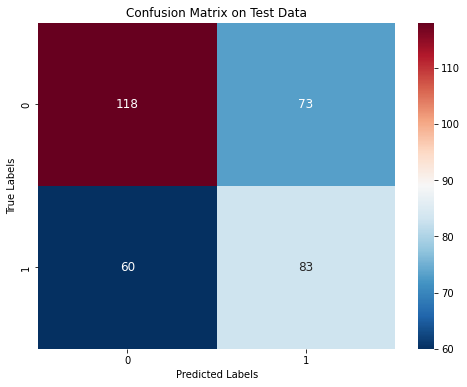

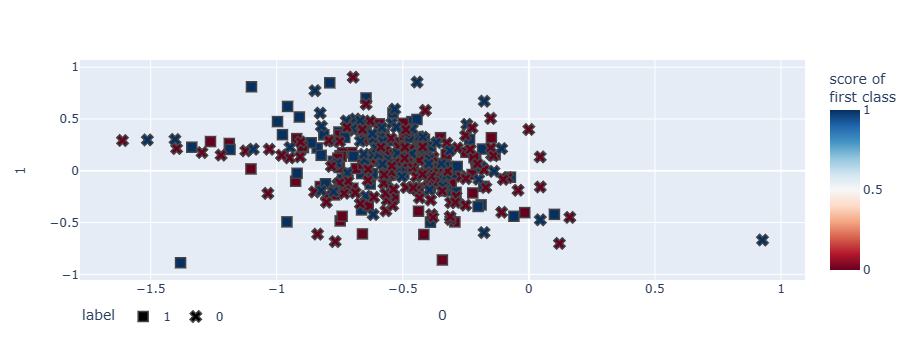

In [108]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [77]:
svm = SVC(random_state=42)
svm.fit(X_train_norm, y_train)
ypredict_train = svm.predict(X_train_norm)    
ypredict_test = svm.predict(X_test_norm) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('Result with NORMALIZED DATA ',f', Test= {test_acc}')

Result with NORMALIZED DATA  , Test= 0.5834967765004749


In [79]:
train_result=[]
test_result=[]
best_result=0
parameters=None

for i in [0.7,0.8,0.9,1]:
    for t in [0.01,0.1,0.15,0.2,0.3]:
        for g in ['scale']:
            for c in [0.1,0.01, 0.001]:
                for d in [1,2]:
                    svm = SVC(kernel='poly', degree=d, random_state=42, C=i,tol=t, gamma=g, coef0=c)


                    svm.fit(X_train_norm, y_train)
                    ypredict_train = svm.predict(X_train_norm)    
                    ypredict_test = svm.predict(X_test_norm) 

                    train_acc = f1_score(y_train, ypredict_train, average='weighted')
                    train_result.append(train_acc)
                    test_acc = f1_score(y_test, ypredict_test, average='weighted')
                    test_result.append(test_acc)
                    if test_acc > best_result:
                        best_result = test_acc
                        parameters ={'c':i, 'tol':t, 'gamma':g, 'coef':c, 'degree':d}
                                                   
                    #print(f'Train ={train_acc}, Test= {test_acc}, c={i}, tol={t}, gamma={g}, coef={c}, degree={d}')
print('Result with NORMALIZED DATA:',best_result,parameters)

Result with NORMALIZED DATA: 0.606338855030733 {'c': 0.9, 'tol': 0.2, 'gamma': 'scale', 'coef': 0.1, 'degree': 1}


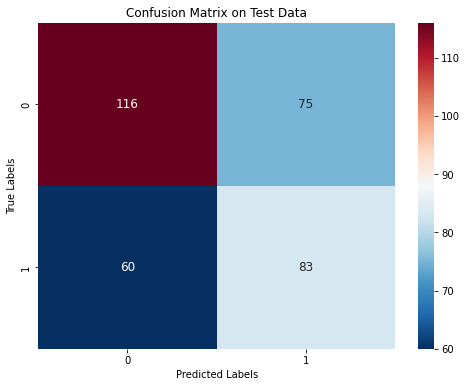

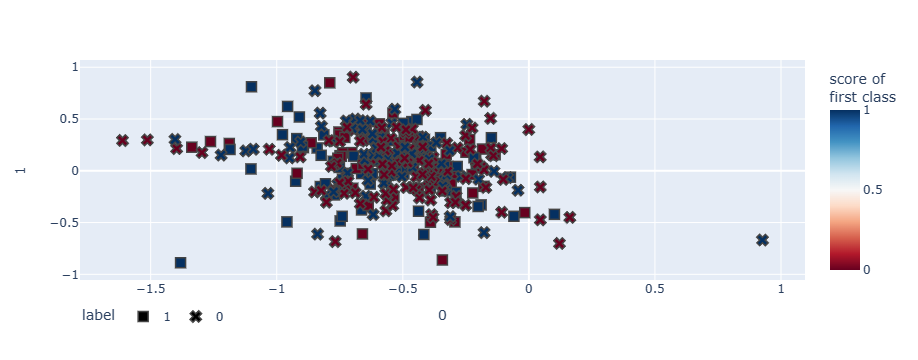

In [80]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [110]:
svm = SVC(random_state=42)
svm.fit(X_train_norm_da, y_train)
ypredict_train = svm.predict(X_train_norm_da)    
ypredict_test = svm.predict(X_test_norm_da) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('Result with NORMALIZED & DATA AUGMENTATION ',f' Test= {test_acc}')

Result with NORMALIZED & DATA AUGMENTATION   Test= 0.5899966644668906


In [84]:
train_result=[]
test_result=[]
best_result=0
parameters=None

for i in [0.9,1,1.3,1.5,2]:  
    for t in [0.0001,0.001,0.1,0.3,0.4,0.5]: 
        for g in ['scale']:
            for c in [0.01, 0.1, 0.001]:
                for d in [1,2]:
                    svm = SVC(kernel='poly', degree=d, random_state=42, C=i,tol=t, gamma=g, coef0=c)


                    svm.fit(X_train_norm_da, y_train)
                    ypredict_train = svm.predict(X_train_norm_da)    
                    ypredict_test = svm.predict(X_test_norm_da) 

                    train_acc = f1_score(y_train, ypredict_train, average='weighted')
                    train_result.append(train_acc)
                    test_acc = f1_score(y_test, ypredict_test, average='weighted')
                    test_result.append(test_acc)
                    if test_acc > best_result:
                        best_result = test_acc
                        parameters ={'c':i, 'tol':t, 'gamma':g, 'coef':c, 'degree':d}
                                                   
                    #print(f'Train ={train_acc}, Test= {test_acc}, c={i}, tol={t}, gamma={g}, coef={c}, degree={d}')
print('Result with NORMALIZED & DATA AUGMENTATION',best_result,parameters)

Result with NORMALIZED & DATA AUGMENTATION 0.6182679806358623 {'c': 1, 'tol': 0.3, 'gamma': 'scale', 'coef': 0.1, 'degree': 1}


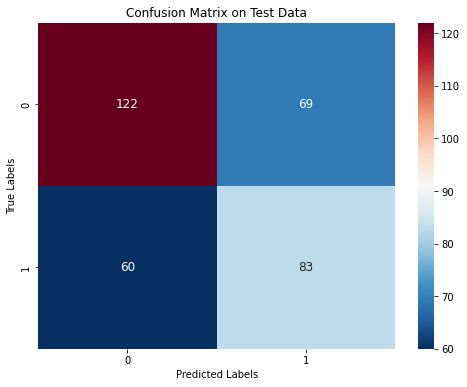

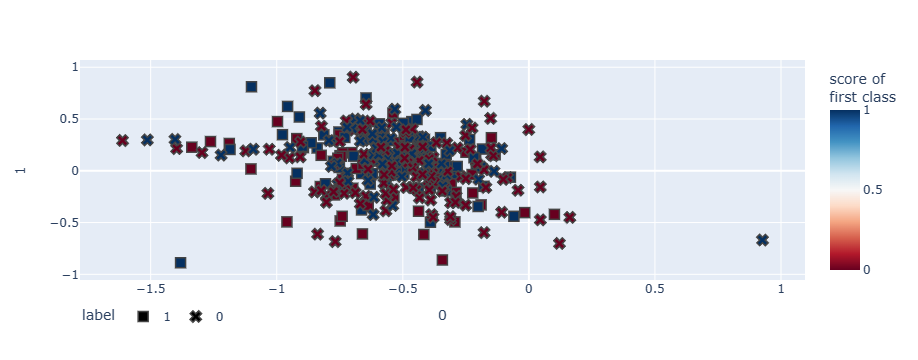

In [85]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

### KNN

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypredict_train = knn.predict(X_train)    
ypredict_test = knn.predict(X_test) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('KNN Base line Result',f'Test= {test_acc}')

KNN Base line Result Test= 0.5433774065900099


In [87]:
train_result=[]
test_result=[]
best_result=0
parameters=None


for i in [18,19,20,21]:
    for d in ['uniform']:
        for c in [1,2]:
            knn = KNeighborsClassifier(n_neighbors=i, weights=d, p=c, )
            knn.fit(X_train, y_train)
            ypredict_train = knn.predict(X_train)    
            ypredict_test = knn.predict(X_test) 

            train_acc = f1_score(y_train, ypredict_train, average='weighted')
            train_result.append(train_acc)
            test_acc = f1_score(y_test, ypredict_test, average='weighted')
            test_result.append(test_acc)
            if test_acc > best_result:
                best_result = test_acc
                parameters ={'n_neighbors':i, 'weights':d, 'p':c}                               
            #print(f'Train ={train_acc}, Test= {test_acc}, n_neighbors={i}, weights={d}, p={c}')
print('KNN Result withOUT NORMALIZED & DATA AUGMENTATION ',best_result,parameters)

KNN Result withOUT NORMALIZED & DATA AUGMENTATION  0.5643795635361799 {'n_neighbors': 20, 'weights': 'uniform', 'p': 2}


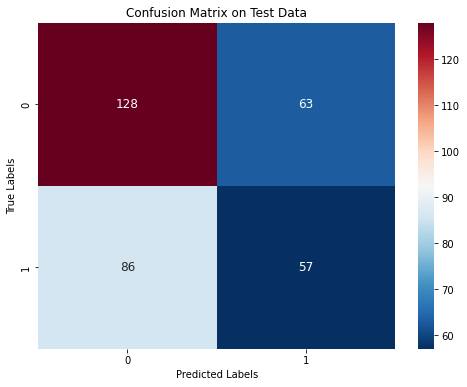

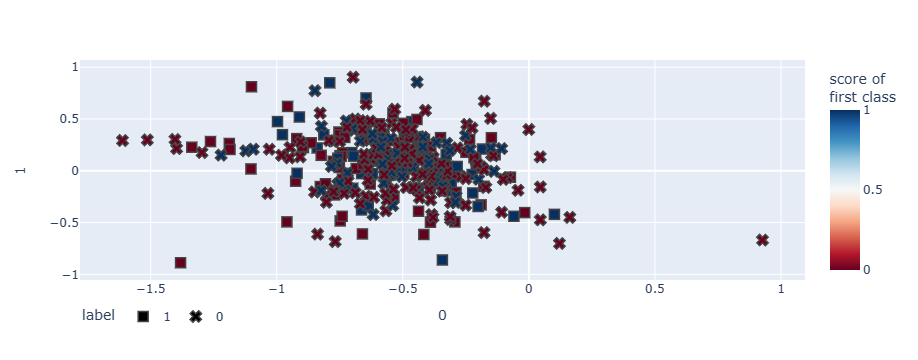

In [88]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [89]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
ypredict_train = knn.predict(X_train_norm)    
ypredict_test = knn.predict(X_test_norm) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('KNN Result with NORMALIZED data',f'Train ={train_acc}, Test= {test_acc}')

KNN Result with NORMALIZED data Train =0.7519913906355831, Test= 0.5405133499348296


In [90]:
train_result=[]
test_result=[]
best_result=0
parameters=None


for i in [2,3,4,5,8,9]:
    for d in ['uniform']:
        for c in [1,2]:
            knn = KNeighborsClassifier(n_neighbors=i, weights=d, p=c, )
            knn.fit(X_train_norm, y_train)
            ypredict_train = knn.predict(X_train_norm)    
            ypredict_test = knn.predict(X_test_norm) 

            train_acc = f1_score(y_train, ypredict_train, average='weighted')
            train_result.append(train_acc)
            test_acc = f1_score(y_test, ypredict_test, average='weighted')
            test_result.append(test_acc)
            if test_acc > best_result:
                best_result = test_acc
                parameters ={'n_neighbors':i, 'weights':d, 'p':c}                               
            #print(f'Train ={train_acc}, Test= {test_acc}, n_neighbors={i}, weights={d}, p={c}')
print('KNN Result with NORMALIZED DATA ',best_result,parameters)

KNN Result with NORMALIZED DATA  0.5763175044853623 {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}


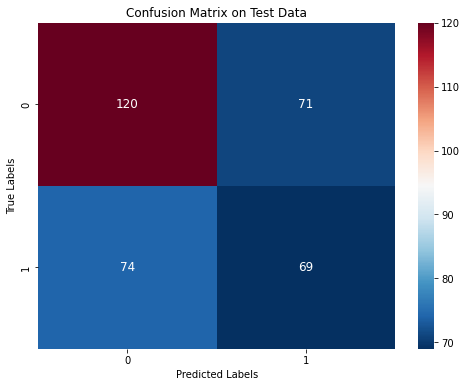

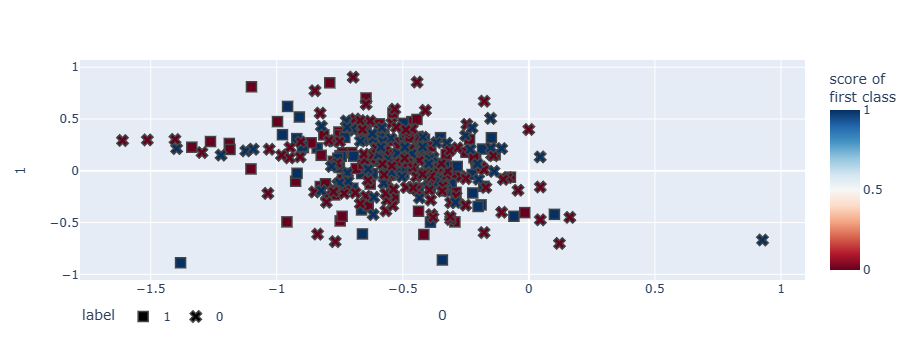

In [91]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm_da, y_train)
ypredict_train = knn.predict(X_train_norm_da)    
ypredict_test = knn.predict(X_test_norm_da) 
            
train_acc = f1_score(y_train, ypredict_train, average='weighted')
test_acc = f1_score(y_test, ypredict_test, average='weighted')
print('KNN Result with NORMALIZED & DATA AUGMENTATION ',f'Test= {test_acc}')

KNN Result with NORMALIZED & DATA AUGMENTATION  Test= 0.5536919564745731


In [113]:
train_result=[]
test_result=[]
best_result=0
parameters=None


for i in [16,17,18,19]: 
    for d in ['uniform']:
        for c in [1,2]:
            knn = KNeighborsClassifier(n_neighbors=i, weights=d, p=c, )
            knn.fit(X_train_norm_da, y_train)
            ypredict_train = knn.predict(X_train_norm_da)    
            ypredict_test = knn.predict(X_test_norm_da) 

            train_acc = f1_score(y_train, ypredict_train, average='weighted')
            train_result.append(train_acc)
            test_acc = f1_score(y_test, ypredict_test, average='weighted')
            test_result.append(test_acc)
            if test_acc > best_result:
                best_result = test_acc
                parameters ={'n_neighbors':i, 'weights':d, 'p':c}                               
            #print(f'Train ={train_acc}, Test= {test_acc}, n_neighbors={i}, weights={d}, p={c}')
print('KNN Result with NORMALIZED & DATA AUGMENTATION',best_result,parameters)

KNN Result with NORMALIZED & DATA AUGMENTATION 0.56944309114909 {'n_neighbors': 17, 'weights': 'uniform', 'p': 1}


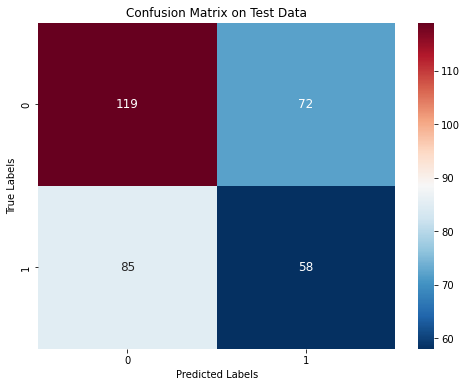

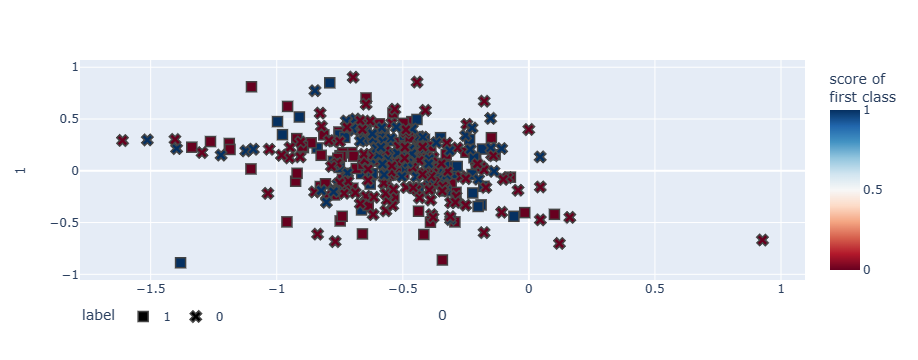

In [94]:
#Confusiion Matrix 
cm = confusion_matrix(y_test, ypredict_test)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(cm, annot=True, cmap='RdBu_r', fmt='d', annot_kws={"fontsize": 12})  # Set the font size for annotations
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

    

fig = px.scatter(
X_test, x=0, y=1,
color=ypredict_test, color_continuous_scale='RdBu',
symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
labels={'symbol': 'label', 'color': 'score of <br>first class'})
fig.update_traces(marker_size=10, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

### DBSCAN

In [61]:
# Compute the embeddings for your sentences
embeddingsPCA = model.encode(sentences_concat_da, convert_to_tensor=True)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components (e.g., 2 for 2D visualization)
reduced_embeddings = pca.fit_transform(embeddingsPCA)

In [62]:
X = reduced_embeddings
labels_true = labels_concat

In [98]:
for e in [0.6]: #0.4,0.5,0.6
    for m in [7]: #4,5,6,7,8
        db = DBSCAN(eps=e, min_samples=m).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print('Estimated number of clusters: %d' % n_clusters_)
        print('Number of Outliers : ', n_noise_)
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Number of Outliers :  44
Silhouette Coefficient: 0.553


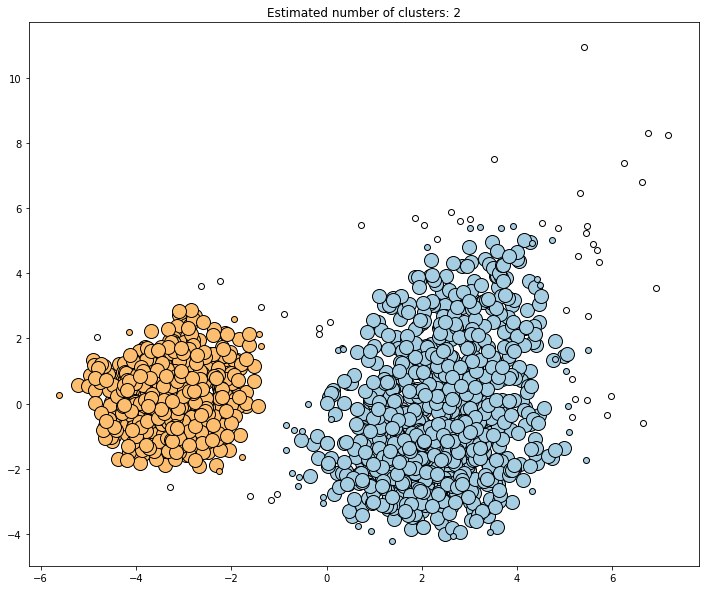

In [99]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
plt.figure(figsize = [12,10])
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'w'
        #continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()